# Introduction

This is mostly Pengs notebook for maing the transcription factor heatmaps for main figure 4.



In [1]:
%matplotlib inline
import scipy.io
import random
import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib
import seaborn as sns
import numpy as np
import sys
import numpy as np
import pandas as pd
import os
from scipy import sparse
plt.show()

In [2]:
mm2inch = 25.4

rcParams['font.family'] = "Arial"

dry_run=False
if dry_run:
    figsize=(10,17)
else:
    rcParams['font.size'] = 5
    rcParams['figure.dpi'] = 300
    figsize = (85/mm2inch, 175/mm2inch)


In [3]:
Mouse10XColors = {'0':'#000000',
           '1':'#0118FA',
           '2':'#C0C0C0',
           '3':'#00FFFF',
           '4':'#FF8380',
           '5':'#8B8A1D',
           '6':'#CAC379',
           '7':'#00FF00',
           '8':'#FFFA2C',
           '9':'#C39CFB',
           '10':'#7762F0',
           '11':'#717E8D',
           '12':'#A71206',
           '13':'#35B5E2',
           '14':'#9834E7',
           '15':'#995432',
           '16':'#483F84',
           '17':'#ff0000',
           '18':'#216407',
           '19':'#ff42ef',
           '20':'#FBC83C',
           '21':'#FF9A21',
           '22':'#B4246E',
           '23':'#09658A',
           '24':'#016edb'}

In [4]:
MouseC1Colors = {'black':'#000000',
                    'grey':'#000000',
                    'blue':'#0118FA',
                    'cyan':'#00FFFF',
                    'red':'#FF8380',
                    'YellowGreen':'#8B8A1D',
                    'green': '#00FF00',
                    'yellow':'#FFFA2C',
                    'purple':'#C39CFB',
                    'magenta':'#9834E7',
                    'DarkRed':'#ff0000',
                    'orange':'#FBC83C'
}

### Using defined markers

In [5]:
OriginalMuscleTF = ['Dnajc2','Sp5','Tcf15','Id2','Myf5','Lbx1','Six1','Tcf12','Pax3','Hoxa11','Trp53','Hmga2','Pitx2',
           'Sim2','Ssrp1','Hmga1','Ybx3','Lyar',
           'Pitx3','Foxo4','Hes6','Heyl','Myod1','En1','Pax7','Msc','Six2','Zeb2','Plagl1',
           'Rbpj','Zbtb18','Myog','Rreb1','Ncoa1','Tead4','Mef2a','Mef2c','Sox8','Zeb1','Casz1','Mycl','Purb',
           'Cdip1','Csdc2','Lrrfip1','Arx','Nfyc','Foxo1','Atf7','Klf5','Egr1','Rxrg']

In [6]:
barbara_muscle_tf=[
    'Hmga2', 'Id2', 'Pax3', 'Sp5', 'Tcf15', 'Lbx1', 'Sim2', 'Myf5', 'Msc', 
    'Pax7', 'Dbx1', 'En1', 'Heyl', 'Tbx1', 'Dmrt2', 'Plagl1', 
    'Pitx3', 'Zeb2', 'Ncoa1', 'Sox8', 'Rreb1', 'Mef2a', 'Zbtb18',
    'Pknox2', 'Tead4', 'Hivep2', 'Prox1', 'Casz1', 
    'Myog', 'Myod1', 'Hes6', 'Purb', 'Mef2c', 'Rxrg', 'Arid5a', 'Klf5', 'Csdc2', 'Arx',
    'Pitx2', 'Six1', 
]

genes not available set()
0.1957378387451172 Mib


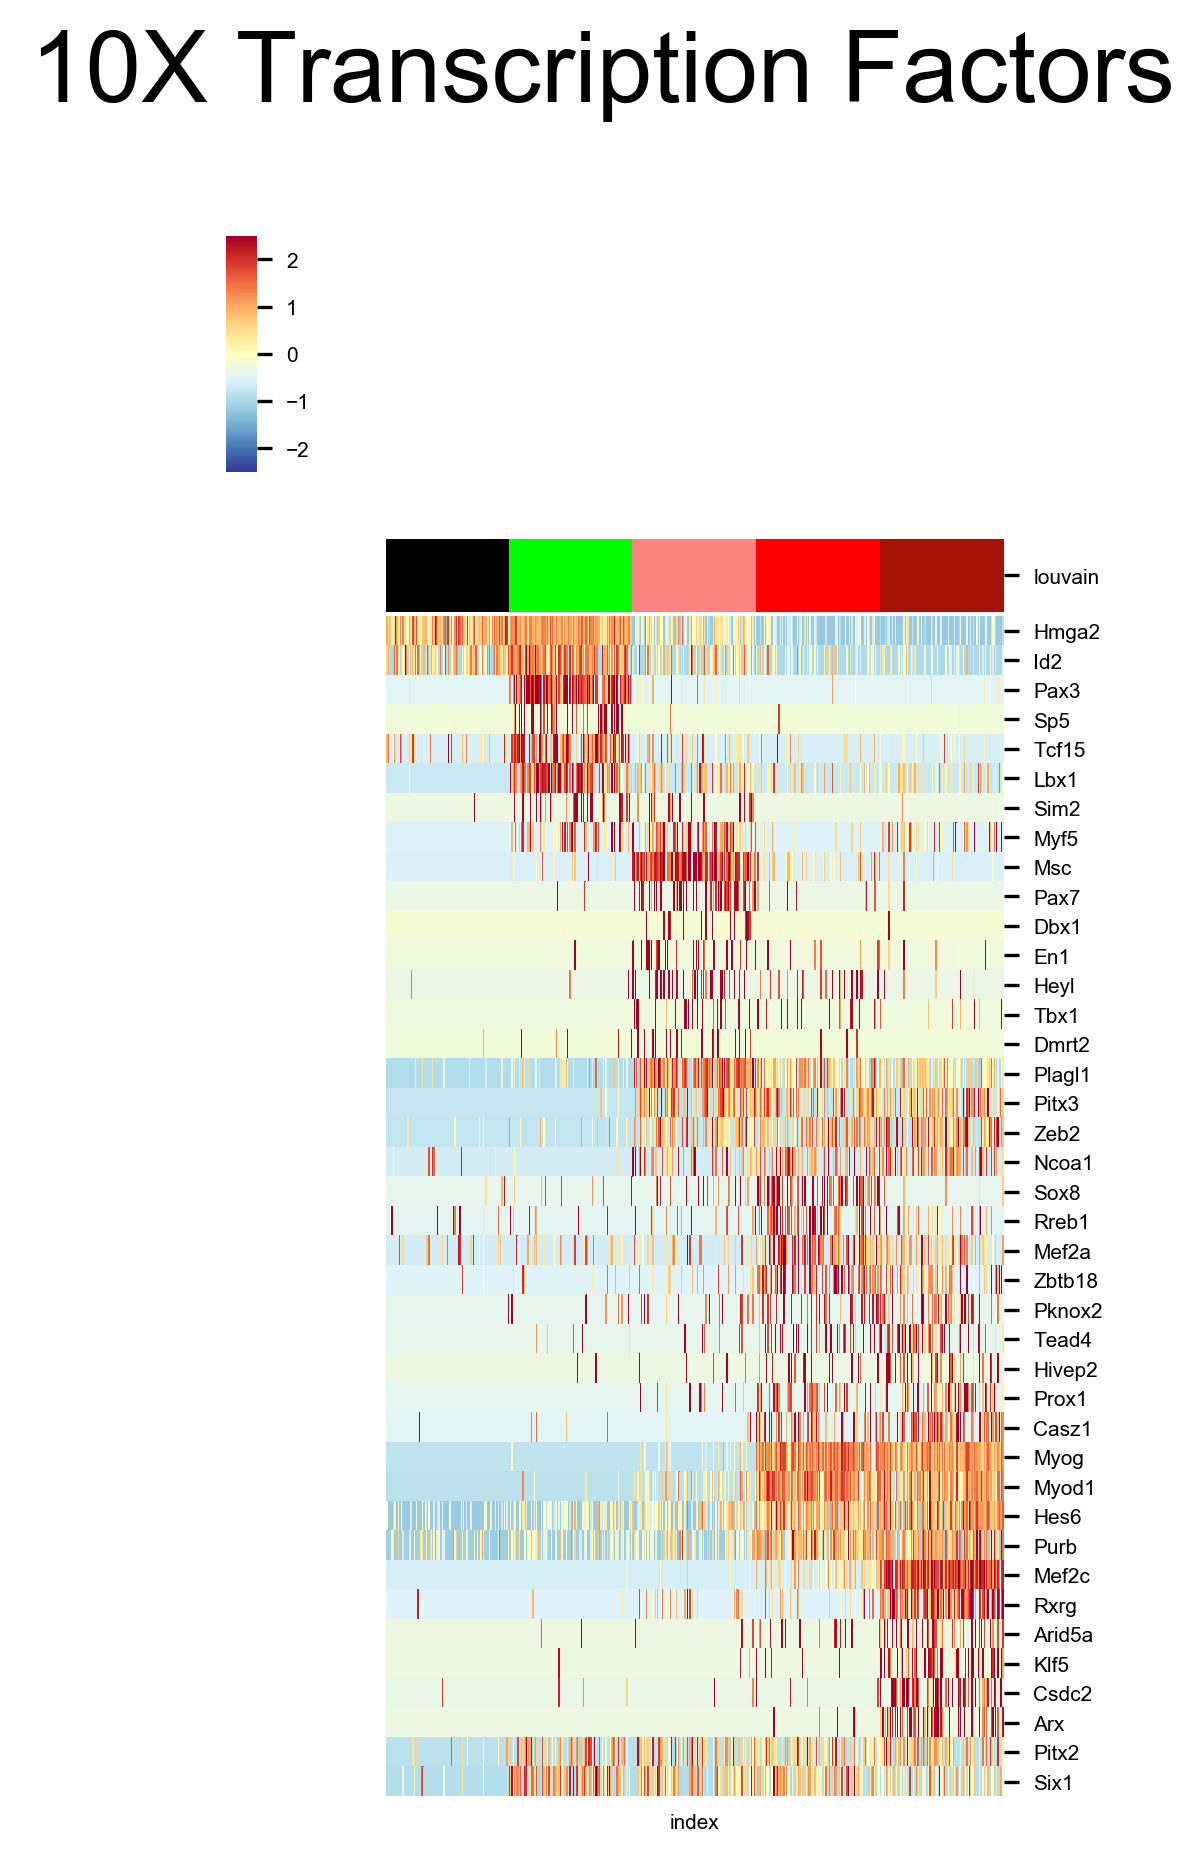

In [7]:
def plot_10x_tf(genes, centered=True, colors=Mouse10XColors):
    NewIndex4=pd.read_csv('heatmap/NewIndex4.txt',header=None).iloc[:,0].values
    Mouse10Xdata_df=pd.read_csv('heatmap/DianeMouse10X_df.csv',index_col=0)
    Mouse10Xdata_df3 = Mouse10Xdata_df.loc[NewIndex4,:]
    print('genes not available', set(genes).difference(Mouse10Xdata_df.columns))

    cluster_names=Mouse10Xdata_df3.pop('louvain').apply(str)
    louvain_col_colors=cluster_names.map(colors)
    adata_for_plotting = Mouse10Xdata_df.loc[NewIndex4,Mouse10Xdata_df.columns.isin(genes)]
    adata_for_plotting = adata_for_plotting.reindex(columns=genes)

    if centered:
        kwargs = {
            'z_score': 0,
            'vmin': -2.5,
            'vmax': 2.5,
        }
        title='10X Transcription Factors'
    else:
        kwargs = {}
        title = '10X Transcription Factors'

    cg1_0point2=sns.clustermap(
        adata_for_plotting.transpose(),
        metric="correlation",
        cmap='RdYlBu_r',
        row_cluster=False,
        col_cluster=False,
        robust=True,
        xticklabels=False,
        figsize=figsize,
        col_colors=louvain_col_colors,
        **kwargs
        #standard_scale=0,
    )
    cg1_0point2.fig.suptitle(title, fontsize=24)
    #cg1_0point2.ax_heatmap.set_rasterized(True)
    [x for x in cg1_0point2.ax_heatmap.get_children() if isinstance(x, matplotlib.collections.QuadMesh)][0].set_rasterized(True)
    return cg1_0point2

f = plot_10x_tf(barbara_muscle_tf)
if not dry_run:
    f.savefig('10X_TF_centered.pdf')
    f.savefig('10X_TF_centered.svg')
    f.savefig('10X_TF_centered.png')
print(os.stat('10X_TF_centered.svg').st_size/(1024**2), 'Mib')
f

In [8]:
[ x for x in f.ax_heatmap.get_children() if isinstance(x, matplotlib.collections.QuadMesh)][0].set_rasterized(True)

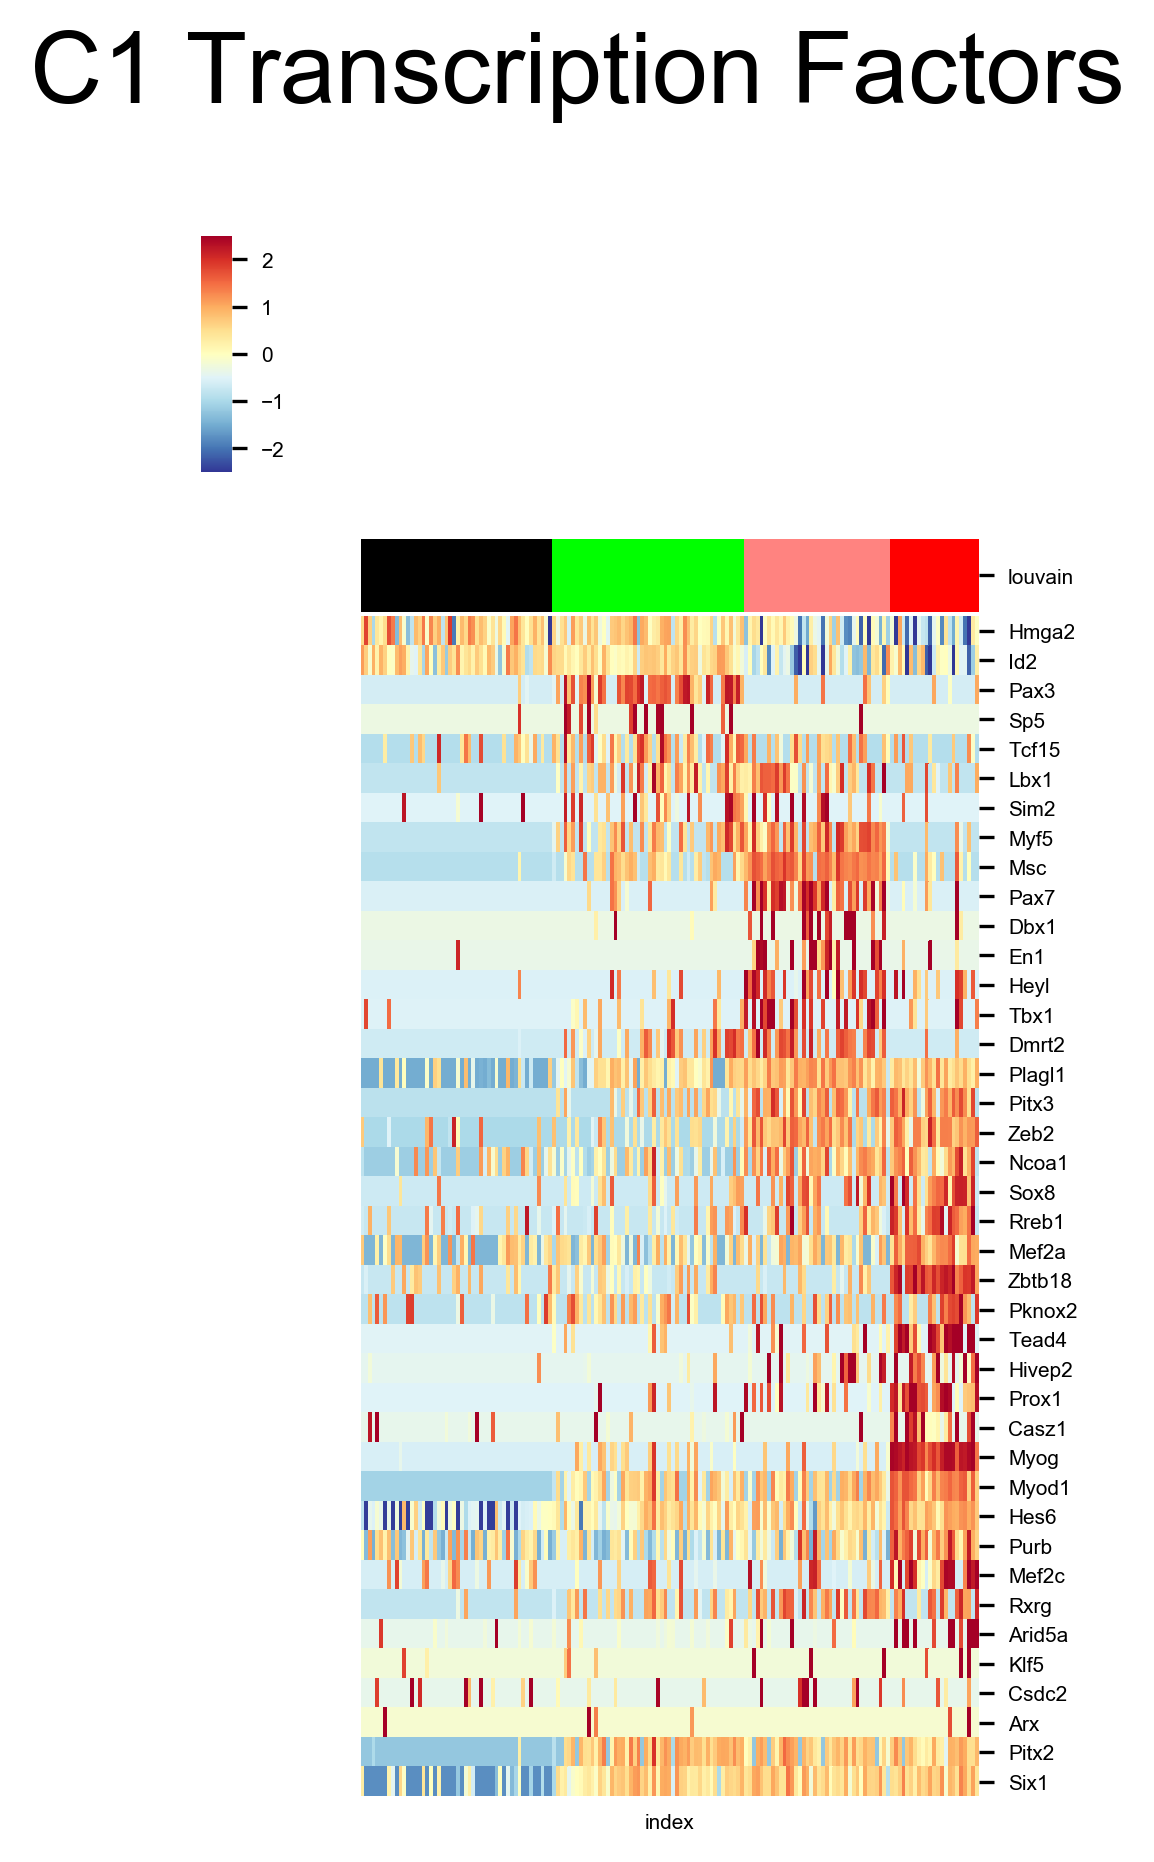

In [9]:
def plot_c1_tf(genes, centered=True, colors=MouseC1Colors):
    C1NewIndex5=pd.read_csv('heatmap/C1NewIndex5.txt',header=None).iloc[:,0].values
    MouseC1data_df=pd.read_csv('heatmap/DianeMouseC1_df.csv',index_col=0)
    MouseC1data_df3 = MouseC1data_df.loc[C1NewIndex5,:]
    cluster_names=MouseC1data_df3.pop('louvain').apply(str)
    louvain_col_colors=cluster_names.map(colors)
    adata_for_plotting = MouseC1data_df.loc[C1NewIndex5,MouseC1data_df.columns.isin(genes)]
    adata_for_plotting = adata_for_plotting.reindex(columns=genes)
    
    if centered:
        kwargs = {
            'z_score': 0,
            'vmin': -2.5,
            'vmax': 2.5,
        }
        title = 'C1 Transcription Factors'        
    else:
        kwargs = {}
        title = 'C1 Transcription Factors'
    
    cg1_0point2=sns.clustermap(
        adata_for_plotting.transpose(),
        metric="correlation",
        cmap='RdYlBu_r',
        row_cluster=False,col_cluster=False,robust=True,xticklabels=False,
        figsize=figsize,
        
        col_colors=louvain_col_colors,
        **kwargs,
        #,standard_scale=0
    )
    cg1_0point2.fig.suptitle(title, fontsize=24)
    #cg1_0point2.ax_heatmap.set_rasterized(True)
    [x for x in cg1_0point2.ax_heatmap.get_children() if isinstance(x, matplotlib.collections.QuadMesh)][0].set_rasterized(True)
    return cg1_0point2
    
f = plot_c1_tf(barbara_muscle_tf)
if not dry_run:
    f.savefig('C1_TF_centered.pdf')
    f.savefig('C1_TF_centered.svg')
    f.savefig('C1_TF_centered.png')
f

genes not available set()


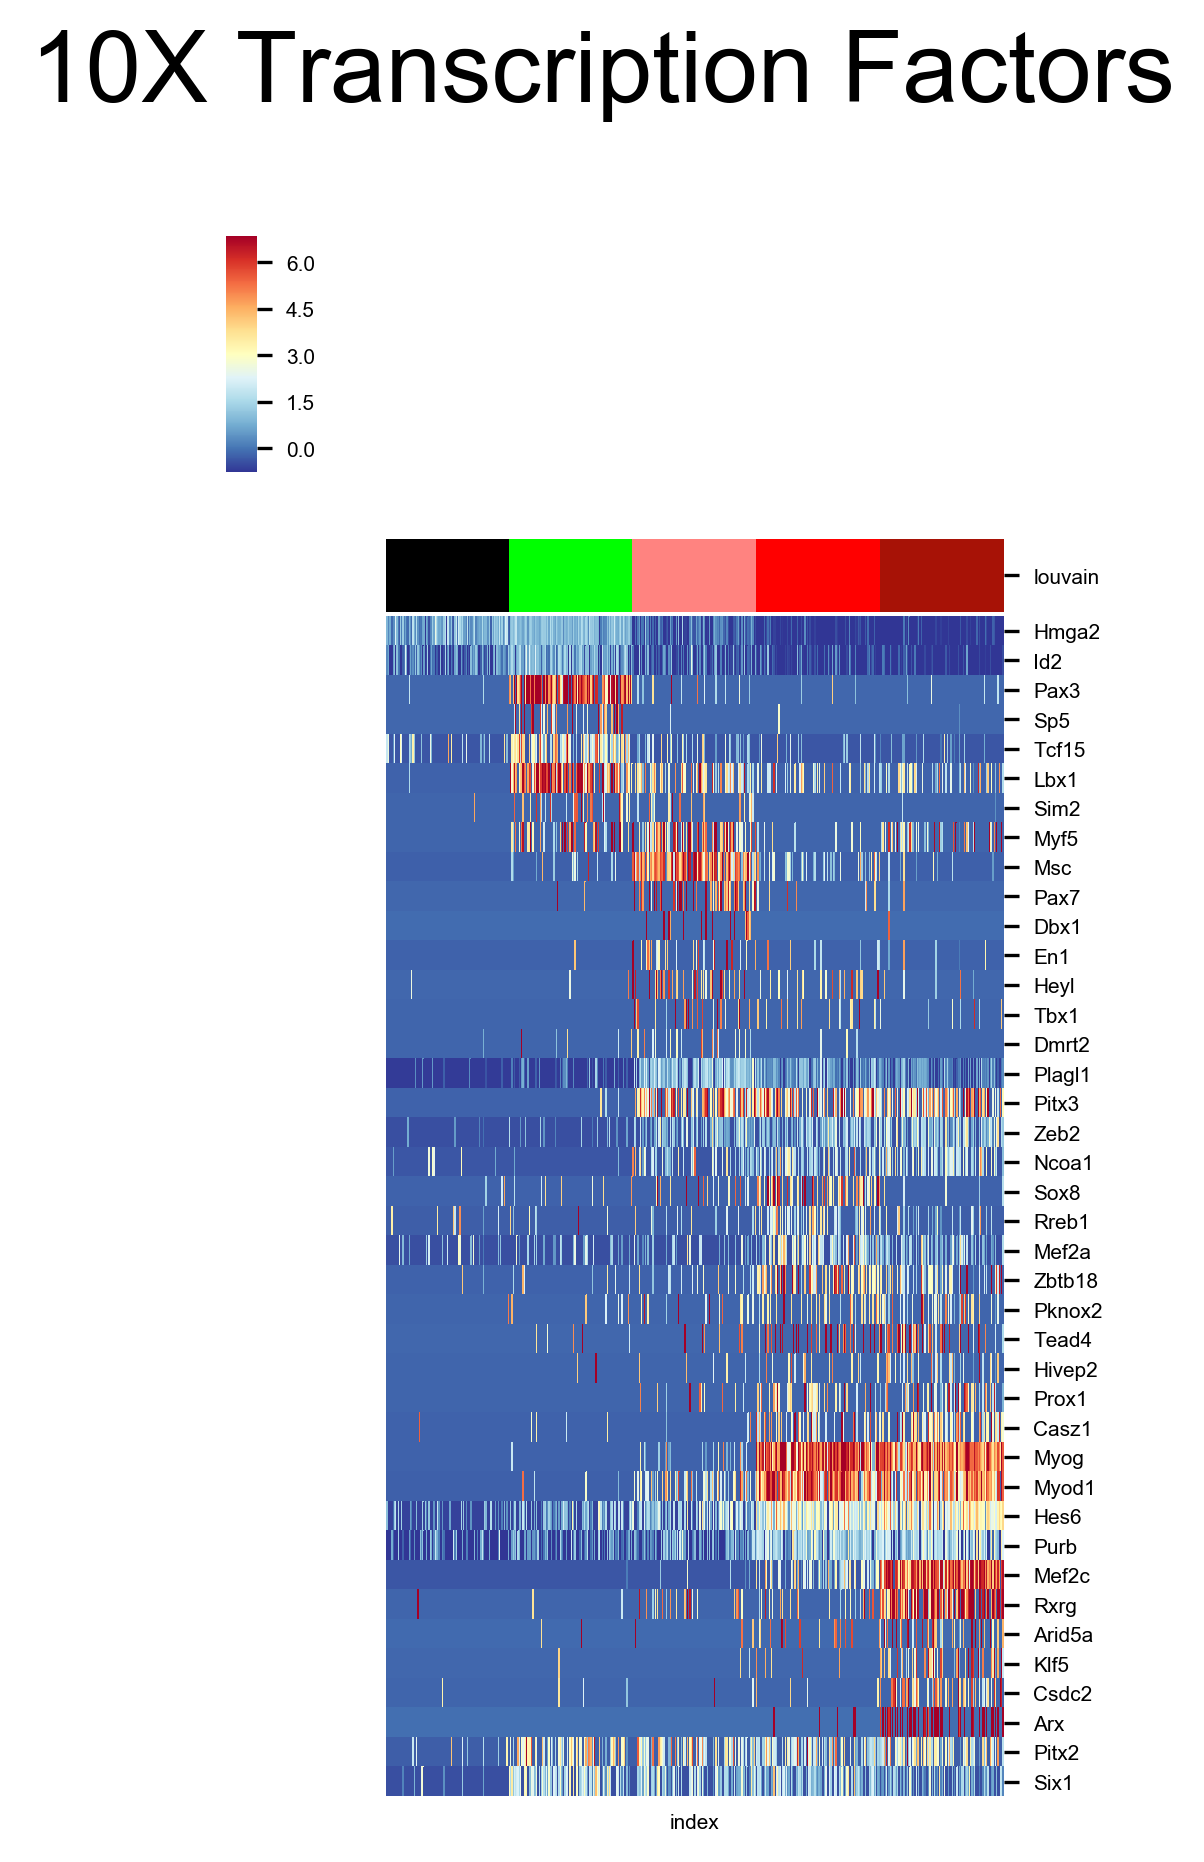

In [10]:
f = plot_10x_tf(barbara_muscle_tf, centered=False)
if not dry_run:
    f.savefig('10X_TF_absolute.pdf')
    f.savefig('10X_TF_absolute.svg')
    f.savefig('10X_TF_absolute.png')
f

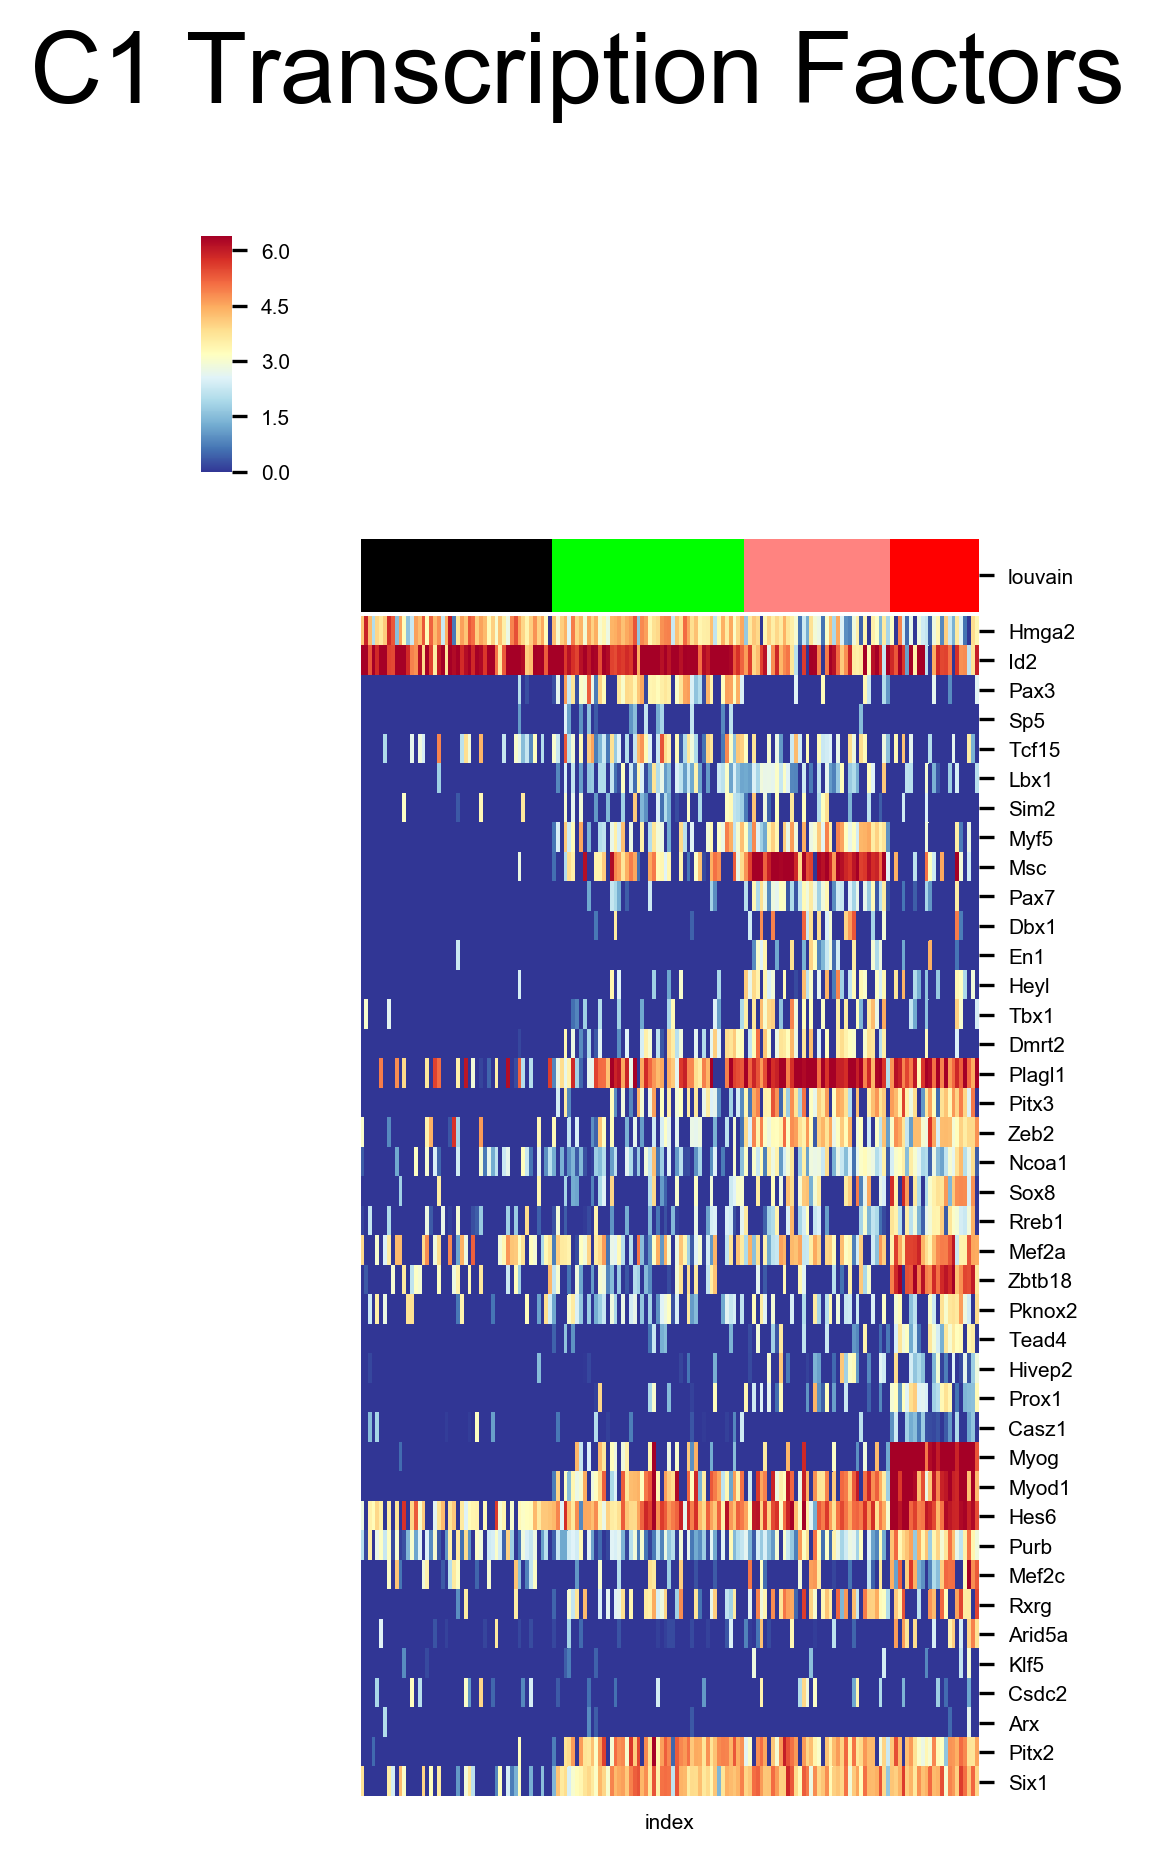

In [11]:
f = plot_c1_tf(barbara_muscle_tf, centered=False)
if not dry_run:
    f.savefig('C1_TF_absolute.pdf')
    f.savefig('C1_TF_absolute.svg')
    f.savefig('C1_TF_absolute.png')
f